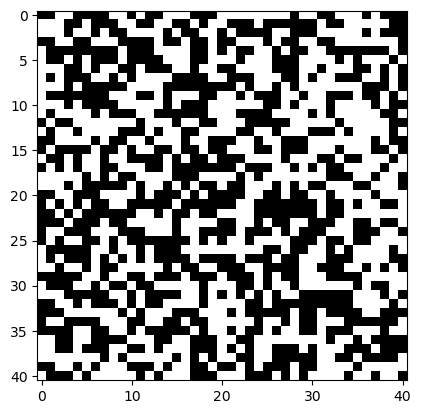

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import random 

# Parameters
J = 1.0     # Coupling constant
b = 1.0     # Inverse temperature (beta)
n = 41
N = n**2   # System size

#creating initial random configuration

s = np.zeros([n,n])

for i in range(0,n):
    for j in range(0,n):
        a = random.randint(0,1)  #randomly assigns spin up or down with 50/50 chance for each
        if a == 0:
            s[i, j] = -1
        else:
            s[i, j] = 1

# Shows initial random pattern  
plt.imshow(s,cmap = 'grey')



pattern = np.zeros([n,n])


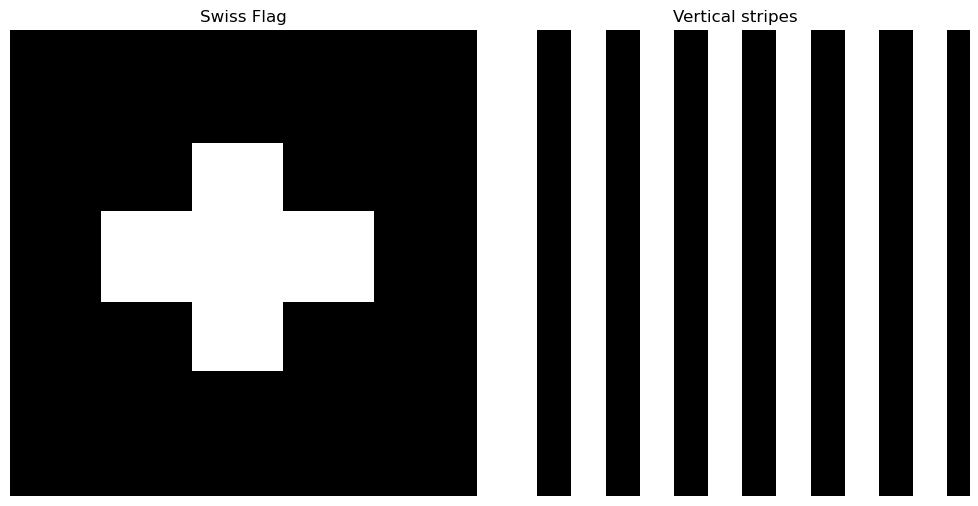

-0.0529446757882213
-89


In [130]:
import numpy as np

def create_swiss_flag(n):
    # Ensure n is odd
    if n % 2 == 0:
        raise ValueError("n must be an odd number to properly center the cross.")
    
    # Create the flag with black given by (-1)
    flag = -np.ones((n, n), dtype=int)
    
    # Defining the dimensions of the cross
    cross_width = n // 5  # Width of the cross arms
    vertical_length = n // 2  # Length of the vertical arm
    horizontal_length = n * 3 // 5  # Length of the horizontal arm
    
    # Calculate the starting and ending indices for the cross
    vertical_start = (n - vertical_length) // 2
    vertical_end = vertical_start + vertical_length
    horizontal_start = (n - horizontal_length) // 2
    horizontal_end = horizontal_start + horizontal_length
    
    # Fill the vertical arm of the cross (white)
    flag[vertical_start:vertical_end, (n - cross_width) // 2 : (n + cross_width) // 2] = 1
    
    # Fill the horizontal arm of the cross (white)
    flag[(n - cross_width) // 2 : (n + cross_width) // 2, horizontal_start:horizontal_end] = 1
    
    return flag

# Example usage
n = 41  # Size of the flag (must be odd)
swiss_flag = create_swiss_flag(n)
pattern_1 = swiss_flag.copy()


def create_vertical_lines(n, line_width=3, spacing=3):
  
    # Create the background (-1 for black)
    pattern = -np.ones((n, n), dtype=int)
    
    # Draw vertical lines
    for x in range(0, n, line_width + spacing):
        pattern[:, x:x + line_width] = 1  # Set pixels to white (1)
    
    return pattern

# Example usage
n = 41  # Size of the pattern (must be odd for symmetry)
pattern_2 = create_vertical_lines(n)


# Display the patterns

# Create a figure with two subplots side by side
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# Plot the Swiss flag pattern
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.imshow(pattern_1, cmap='gray')
plt.title("Swiss Flag")
plt.axis('off')  # Hide axes

# Plot the vertical striped pattern
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.imshow(pattern_2, cmap='gray')
plt.title("Vertical stripes")
plt.axis('off')  # Hide axes

# Show the figure
plt.tight_layout()  # Adjust spacing between subplots
plt.show()


    
overlap_12 = 0 
for i in range(pattern_1.shape[0]):
    for j in range(pattern_2.shape[1]):
        overlap_12 += pattern_1[i,j]*pattern_2[i,j]
        
print(overlap_12/N)
print(overlap_12)

In [132]:
Connectivity_Matrix = np.zeros([n,n,n,n])




for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                if i == k and j == l:
                    Connectivity_Matrix[i,j,k,l] = 0
                else:
                    Connectivity_Matrix[i,j,k,l] = (pattern_1[i,j]*pattern_1[k,l] + pattern_2[i,j]*pattern_2[k,l])/N
        


In [134]:
b_neg = 0 
b_0 = 0 
b_pos = 0 
for i in range(n):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                a = Connectivity_Matrix[i,j,k,l]
                if a < 0:
                    b_neg+=1
                elif a == 0:
                     b_0+=1
                else:
                     b_pos+=1
                     
print(b_neg)
print(b_0)
print(b_pos)

C = (b_neg + b_0 + b_pos )/n**4
print(C)

402744
1410601
1012416
1.0


In [136]:
print(Connectivity_Matrix.shape)

(41, 41, 41, 41)


In [140]:
def Hopfield_Hamiltonian(n):
    H = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                for l in range(n):
                    if i == k and j == l:
                        term = 0
                    else: 
                        term = -0.5* Connectivity_Matrix[i,j,k,l] * s[i,j]*s[k,l]
                    H += term 
    return H 
energy = Hopfield_Hamiltonian(n)
print(energy)

-0.03807257584770966
